In [1]:
from functools import partial
import matplotlib.pyplot as plt
import random
import math

In [2]:
def sum_of_squares(v):
    """computes the sum of squared elements in v"""
    return sum(v_i ** 2 for v_i in v)

In [3]:
def difference_quotient(f,x,h):
    return(f(x + h) - f(x)) / h

In [4]:
def square(x):
    return x*x
def derivative(x):
    return 2*x

In [5]:
derivative_estimate = partial(difference_quotient, square, h = 0.00001)

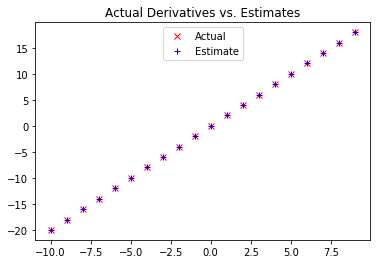

In [6]:
x = range(-10,10)
plt.title("Actual Derivatives vs. Estimates")
plt.plot(x, list(map(derivative, x)), 'rx', label='Actual') # red x
plt.plot(x, list(map(derivative_estimate, x)), 'b+', label='Estimate') # blue +
plt.legend(loc=9)
plt.show()

In [7]:
def partial_difference_quotient(f, v, i, h):
    w = [v_j + (h if j == i else 0) for j, v_j in enumerate(v)]
    return(f(w) - f(v))/h

In [8]:
def estimate_gradient(f, v, h=0.00001):
    return [partial_difference_quotient(f, v, i, h)
            for i, _ in enumerate(v)]

In [9]:
def step(v, direction, step_size):
    """move step_size in the direction from v"""
    return [v_i + step_size * direction_i
            for v_i, direction_i in zip(v, direction)]

In [10]:
def sum_of_squares_gradient(v):
    return [2 * v_i for v_i in v]

In [11]:
v = [random.randint(-10,10) for i in range(3)]
tolerance = 0.0000001

In [12]:
def squared_distance(v, w):
    """(v_1 - w_1) ** 2 + ... + (v_n - w_n) ** 2"""
    return sum_of_squares(vector_subtract(v, w))

In [13]:
def distance(v, w):
    return math.sqrt(squared_distance(v, w))

In [14]:
def vector_subtract(v, w):
    """subtracts corresponding elements"""
    return [v_i - w_i
            for v_i, w_i in zip(v, w)]

def squared_distance(v, w):
    """(v_1 - w_1) ** 2 + ... + (v_n - w_n) ** 2"""
    return sum_of_squares(vector_subtract(v, w))

def distance(v, w):
    return math.sqrt(squared_distance(v, w))

In [15]:
while True:
    gradient = sum_of_squares_gradient(v)
    next_v = step(v, gradient, -0.01)
    if distance(next_v, v) < tolerance:
        break
    v = next_v

In [16]:
v

[1.8134797773694507e-06, 4.533699443423632e-06, 9.067398886847253e-07]